In [2]:

import pandas as pd

buy_record = pd.read_csv('../rs.csv')

In [3]:
buy_record.head()

,Unnamed: 0,user,item,qty,datetime
0,0,32011003635952,16198,1,2014-01-01 0:39:00
1,1,32009100468450,18107,4,2014-01-01 1:07:00
2,2,32013007873699,13612,2,2014-01-01 7:00:00
3,3,32011004803503,42496,1,2014-01-01 7:06:00
4,4,32011004221857,8875,4,2014-01-01 7:09:00


In [4]:
# total transaction amount

buy_record.count()

Unnamed: 0    242124
user          242124
item          242124
qty           242124
datetime      242124
dtype: int64

In [5]:
# total user amount 

len(buy_record.user.unique())

2000

In [6]:
# total items amount

len(buy_record.item.unique())

1000

In [7]:
buy_record.corr()

,Unnamed: 0,user,item,qty
Unnamed: 0,1.000000,0.017753,0.047111,0.001413
user,0.017753,1.000000,-0.001021,-0.000806
item,0.047111,-0.001021,1.000000,-0.009597
qty,0.001413,-0.000806,-0.009597,1.000000


In [8]:
# user-buying record 稀疏矩陣
pd.get_dummies(buy_record.user).head()

,32009000000620,32009000001559,32009000002334,32009000006899,32009000030191,32009000036339,32009000055545,32009000055965,32009000060167,32009000084675,...,32013010597827,32013010603924,32013010609117,32013010645054,32013010774648,32013010785118,32013010804444,32013010956006,32013010959717,32013011034017
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df = pd.get_dummies(buy_record.user)

In [10]:
train = pd.concat([buy_record.qty, df], axis = 1)

In [11]:
train.head()

,qty,32009000000620,32009000001559,32009000002334,32009000006899,32009000030191,32009000036339,32009000055545,32009000055965,32009000060167,...,32013010597827,32013010603924,32013010609117,32013010645054,32013010774648,32013010785118,32013010804444,32013010956006,32013010959717,32013011034017
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn import preprocessing

y = buy_record.item
le = preprocessing.LabelEncoder()
le.fit(y)
le.transform(y)
## le.inverse_transform([0, 0, 1, 2])

array([633, 695, 535, ..., 255, 799, 370], dtype=int64)

In [13]:
train_y = le.transform(y)

## 交叉驗證 & learning curve

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [31]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)

<module 'matplotlib.pyplot' from 'C:\\Users\\hsuan\\Anaconda3\\envs\\myproject\\lib\\site-packages\\matplotlib\\pyplot.py'>

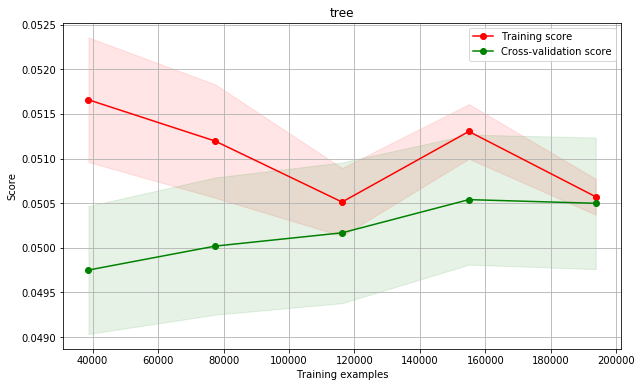

In [30]:
# cross validation

from sklearn.model_selection import KFold,StratifiedKFold


cv = KFold(n_splits=5, random_state=None, shuffle=True)
estimator = tree  #model可更換
plot_learning_curve(estimator, "tree", train, train_y, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5)) #切分資料

## split dataset：5-Fold CV 

In [ ]:
from sklearn.model_selection import cross_val_predict
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
predicted = cross_val_predict(clf, train, train_y, cv=5)
metrics.accuracy_score(train_y, predicted)

## split dataset  testSet

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train, y_train) # fit : training model

In [19]:
y_pred = tree.predict(X_test) # predict : testing data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.050786089925383408

## AUC

In [21]:
import numpy as np
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.50129435578260328